In [33]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [34]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [35]:
pathname="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/FTXX45_II_01+10_ancilla_twirl_09192024_R/"
c_d2,circuit_count= read_circuit_file(pathname+"d=2.txt")
print (circuit_count)

c_d8,circuit_count= read_circuit_file(pathname+"d=8.txt")
print (circuit_count)

c_d16,circuit_count= read_circuit_file(pathname+"d=16.txt")
print (circuit_count)

c_d32,circuit_count= read_circuit_file(pathname+"d=32.txt")
print (circuit_count)


20
20
20
20


In [55]:
paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 II_FTXX45__d=2/"
paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 II_FTXX45__d=8/"
paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 II_FTXX45__d=16/"
paf_data_d16_rerun="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 II_FTXX45__d=16_rerun/"
paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 II_FTXX45__d=32/"

filenames_d2=read_data_file(paf_data_d2)
print (filenames_d2)
filenames_d4=[]
filenames_d8=read_data_file(paf_data_d8)
filenames_d16=read_data_file(paf_data_d16)
filenames_d32=read_data_file(paf_data_d32)

print (filenames_d8)
print (filenames_d16)
print (filenames_d32)

filenames_d16_rerun=read_data_file(paf_data_d16_rerun)
# filenames_d16_goodgates=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/")

['2024-09-19-191540_Line_001.txt', '2024-09-19-191608_Line_002.txt', '2024-09-19-191635_Line_003.txt', '2024-09-19-191702_Line_004.txt', '2024-09-19-191728_Line_005.txt', '2024-09-19-191756_Line_006.txt', '2024-09-19-191824_Line_007.txt', '2024-09-19-191851_Line_008.txt', '2024-09-19-191918_Line_009.txt', '2024-09-19-191944_Line_010.txt', '2024-09-19-213732_Line_011.txt', '2024-09-19-213758_Line_012.txt', '2024-09-19-213826_Line_013.txt', '2024-09-19-213853_Line_014.txt', '2024-09-19-213919_Line_015.txt', '2024-09-19-213947_Line_016.txt', '2024-09-19-214014_Line_017.txt', '2024-09-19-214922_Line_018.txt', '2024-09-19-214949_Line_019.txt', '2024-09-19-215016_Line_020.txt']
['2024-09-19-192458_Line_001.txt', '2024-09-19-192540_Line_002.txt', '2024-09-19-192619_Line_003.txt', '2024-09-19-192701_Line_004.txt', '2024-09-19-192741_Line_005.txt', '2024-09-19-192823_Line_006.txt', '2024-09-19-192902_Line_007.txt', '2024-09-19-192943_Line_008.txt', '2024-09-19-193024_Line_009.txt', '2024-09-19-

In [56]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20

a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")
b=Quantum_State(5)
spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


In [42]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
shots=2000
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()
print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
    # a_s=spam1.Correct_SPAM(a)
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
        

['2024-09-19-191540_Line_001.txt', '2024-09-19-191608_Line_002.txt', '2024-09-19-191635_Line_003.txt', '2024-09-19-191702_Line_004.txt', '2024-09-19-191728_Line_005.txt', '2024-09-19-191756_Line_006.txt', '2024-09-19-191824_Line_007.txt', '2024-09-19-191851_Line_008.txt', '2024-09-19-191918_Line_009.txt', '2024-09-19-191944_Line_010.txt', '2024-09-19-213732_Line_011.txt', '2024-09-19-213758_Line_012.txt', '2024-09-19-213826_Line_013.txt', '2024-09-19-213853_Line_014.txt', '2024-09-19-213919_Line_015.txt', '2024-09-19-213947_Line_016.txt', '2024-09-19-214014_Line_017.txt', '2024-09-19-214922_Line_018.txt', '2024-09-19-214949_Line_019.txt', '2024-09-19-215016_Line_020.txt']
2024-09-19-191540_Line_001.txt
counts: [62, 4, 1317, 37, 3, 1, 150, 27, 122, 5, 205, 10, 21, 7, 23, 6]
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-191608_Line_002.txt
counts: [46, 261, 0, 4, 68, 1442, 1, 33, 3, 32, 0, 4, 4, 84, 1, 17]
counts sim: [0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0

In [43]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)

    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-19-192458_Line_001.txt
counts: [5, 23, 36, 220, 6, 76, 52, 1343, 4, 10, 3, 17, 3, 96, 9, 97]
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-192540_Line_002.txt
counts: [4, 25, 2, 6, 6, 162, 7, 87, 38, 144, 4, 8, 74, 1360, 1, 72]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-19-192619_Line_003.txt
counts: [0, 19, 5, 88, 1, 54, 11, 191, 2, 18, 55, 428, 2, 37, 60, 1029]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-19-192701_Line_004.txt
counts: [158, 9, 37, 2, 18, 7, 4, 2, 1320, 72, 190, 12, 106, 42, 19, 2]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-192741_Line_005.txt
counts: [4, 8, 36, 61, 9, 162, 64, 1443, 2, 8, 2, 7, 6, 79, 5, 104]
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-192823_Line_006.txt
counts: [6, 35, 11, 60, 13, 211, 25, 406, 4, 15, 30, 121, 5, 84, 33, 941]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-

2024-09-19-193425_Line_001.txt
counts: [8, 28, 19, 62, 4, 56, 7, 180, 18, 69, 64, 299, 16, 189, 52, 929]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]


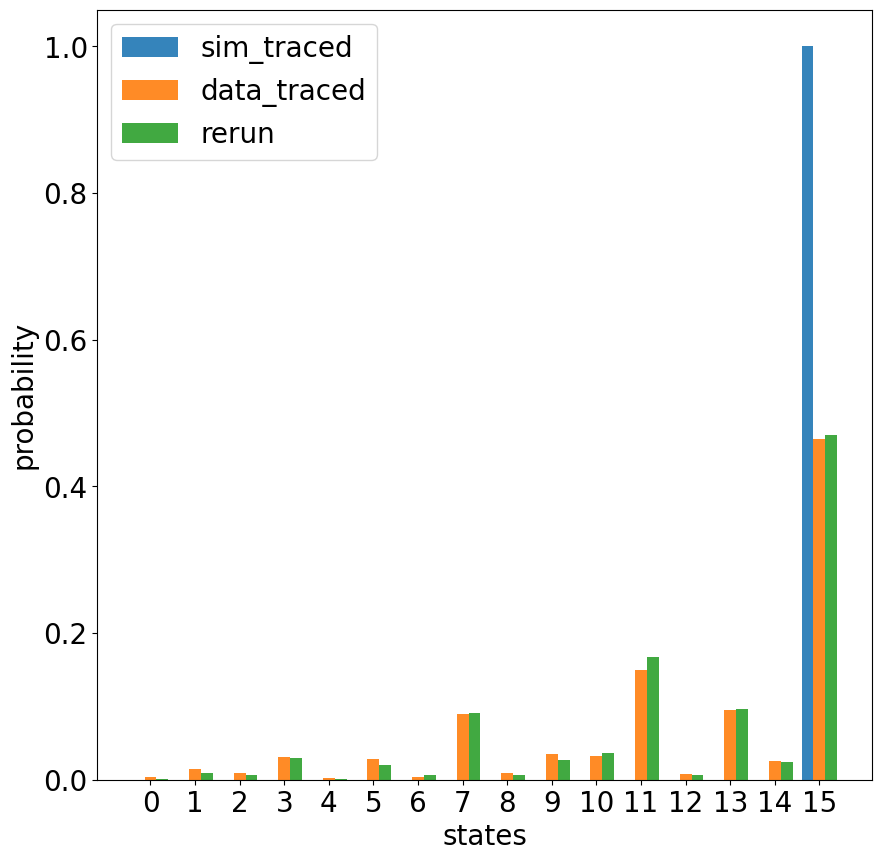

2024-09-19-193527_Line_002.txt
counts: [6, 60, 22, 218, 2, 41, 24, 123, 10, 38, 95, 782, 10, 30, 59, 480]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]


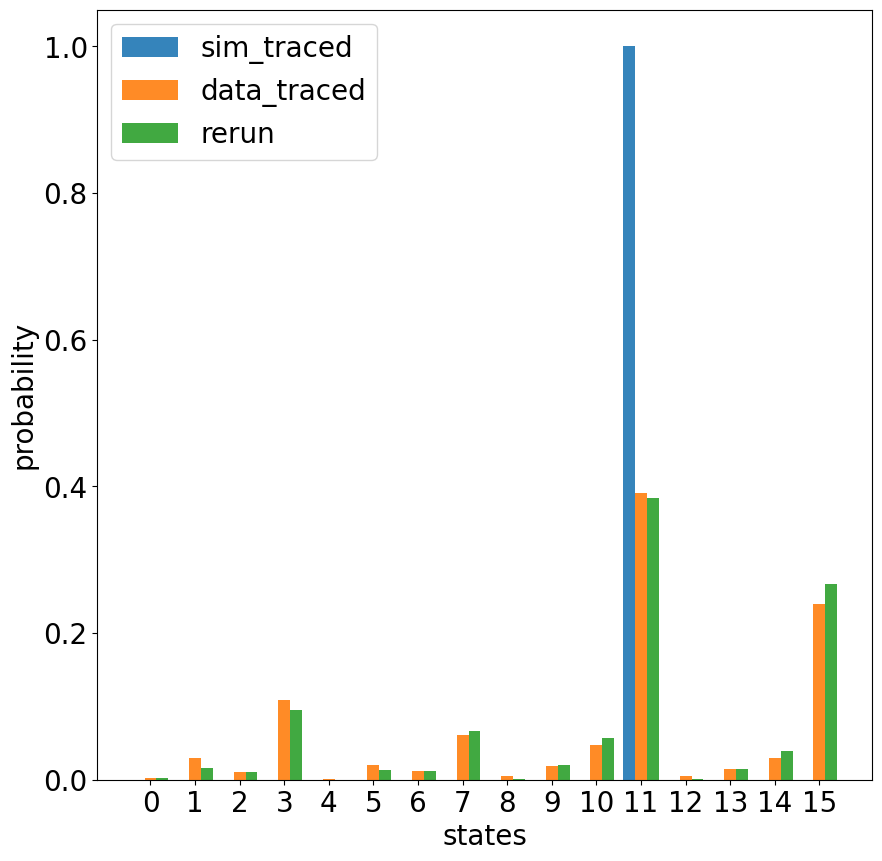

2024-09-19-193628_Line_003.txt
counts: [58, 903, 4, 99, 95, 307, 13, 38, 12, 197, 4, 124, 23, 77, 11, 35]
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


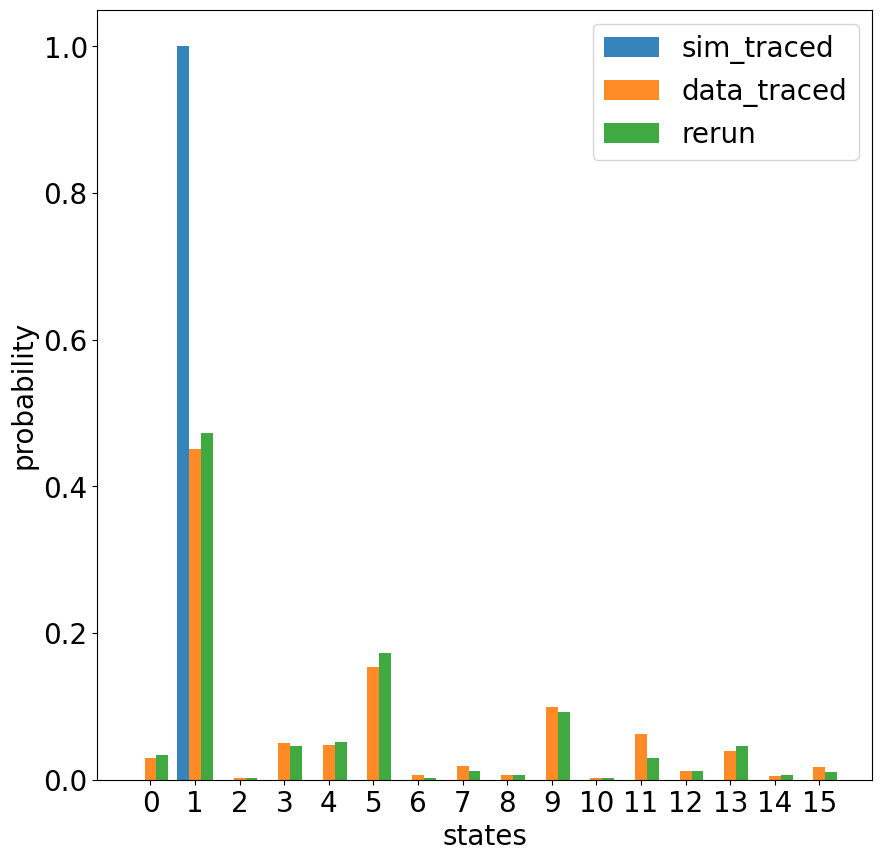

2024-09-19-193731_Line_004.txt
counts: [3, 67, 39, 860, 6, 43, 46, 444, 1, 39, 12, 237, 4, 21, 18, 160]
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


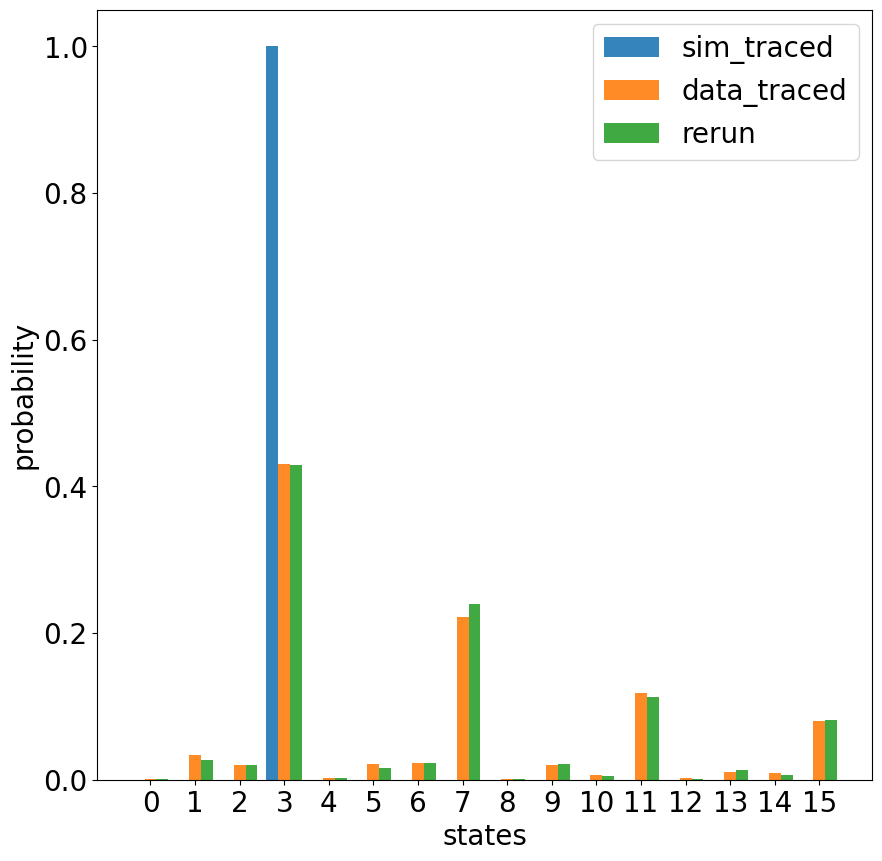

2024-09-19-193834_Line_005.txt
counts: [811, 67, 53, 4, 300, 60, 12, 6, 344, 24, 71, 9, 177, 28, 28, 6]


IndexError: list index out of range

In [57]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    b.Import(paf_data_d16_rerun+filenames_d16_rerun[i],keep_file=True)
    b_traced=Trace_Out(b,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    # sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    Display_States_Population(states=[sim_traced,data_traced,b_traced],label=["sim_traced","data_traced","rerun"])

In [45]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-19-195355_Line_001.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-195557_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-195755_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-19-195945_Line_004.txt
counts sim: [2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-200144_Line_005.txt
counts sim: [0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-200442_Line_006.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-200643_Line_007.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-200846_Line_008.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-201042_Line_009.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-201246_Line_010.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-19-201549_Line_011.txt
counts sim: [0, 0, 

In [46]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/FTXX45_II_01+10_ancilla_twirl_09192024_R/4b420f70-10d3-49aa-b404-44b80e423bb9FTXX45_II_01+10_ancilla_twirl_09192024_R", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
# print (picklefile)
# print (b)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_2 = pickle.load(fp)
# print (picklefile)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_3 = pickle.load(fp)
# print (picklefile)


C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [47]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [23]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [50]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

for pauli in eab_result:
    print (eab_result[pauli])


{'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.601, 0.855, 0.776, 0.649, 0.795, 0.817, 0.869, 0.877, 0.824, 0.851, 0.809, 0.853, 0.806, 0.852, 0.712, 0.834, 0.835, 0.767, 0.813, 0.534], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.761, 0.701, 0.631, 0.763, 0.787, 0.233, 0.439, 0.707, 0.76, 0.666, 0.629, 0.447, 0.669, 0.628, 0.582, 0.687, 0.37, 0.706, 0.431, 0.827], 16: [0.636, 0.504, 0.517, 0.508, 0.313, 0.466, 0.491, 0.559, 0.5

Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.04331674628316318
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0384313 0.003059
YI 0.043005 0.0030155
ZI 0.0160902 0.0020368
IX 0.0391395 0.0031526
XX 0.0682362 0.0040397
YX 0.0732763 0.0039009
ZX 0.0542534 0.0036194
IY 0.0392471 0.003211
XY 0.0698067 0.0037659
YY 0.0748163 0.0038576
ZY 0.0545308 0.0039971
IZ 0.0068215 0.000778
XZ 0.0445913 0.0032113
YZ 0.0483065 0.0031742
ZZ 0.0225159 0.0020687


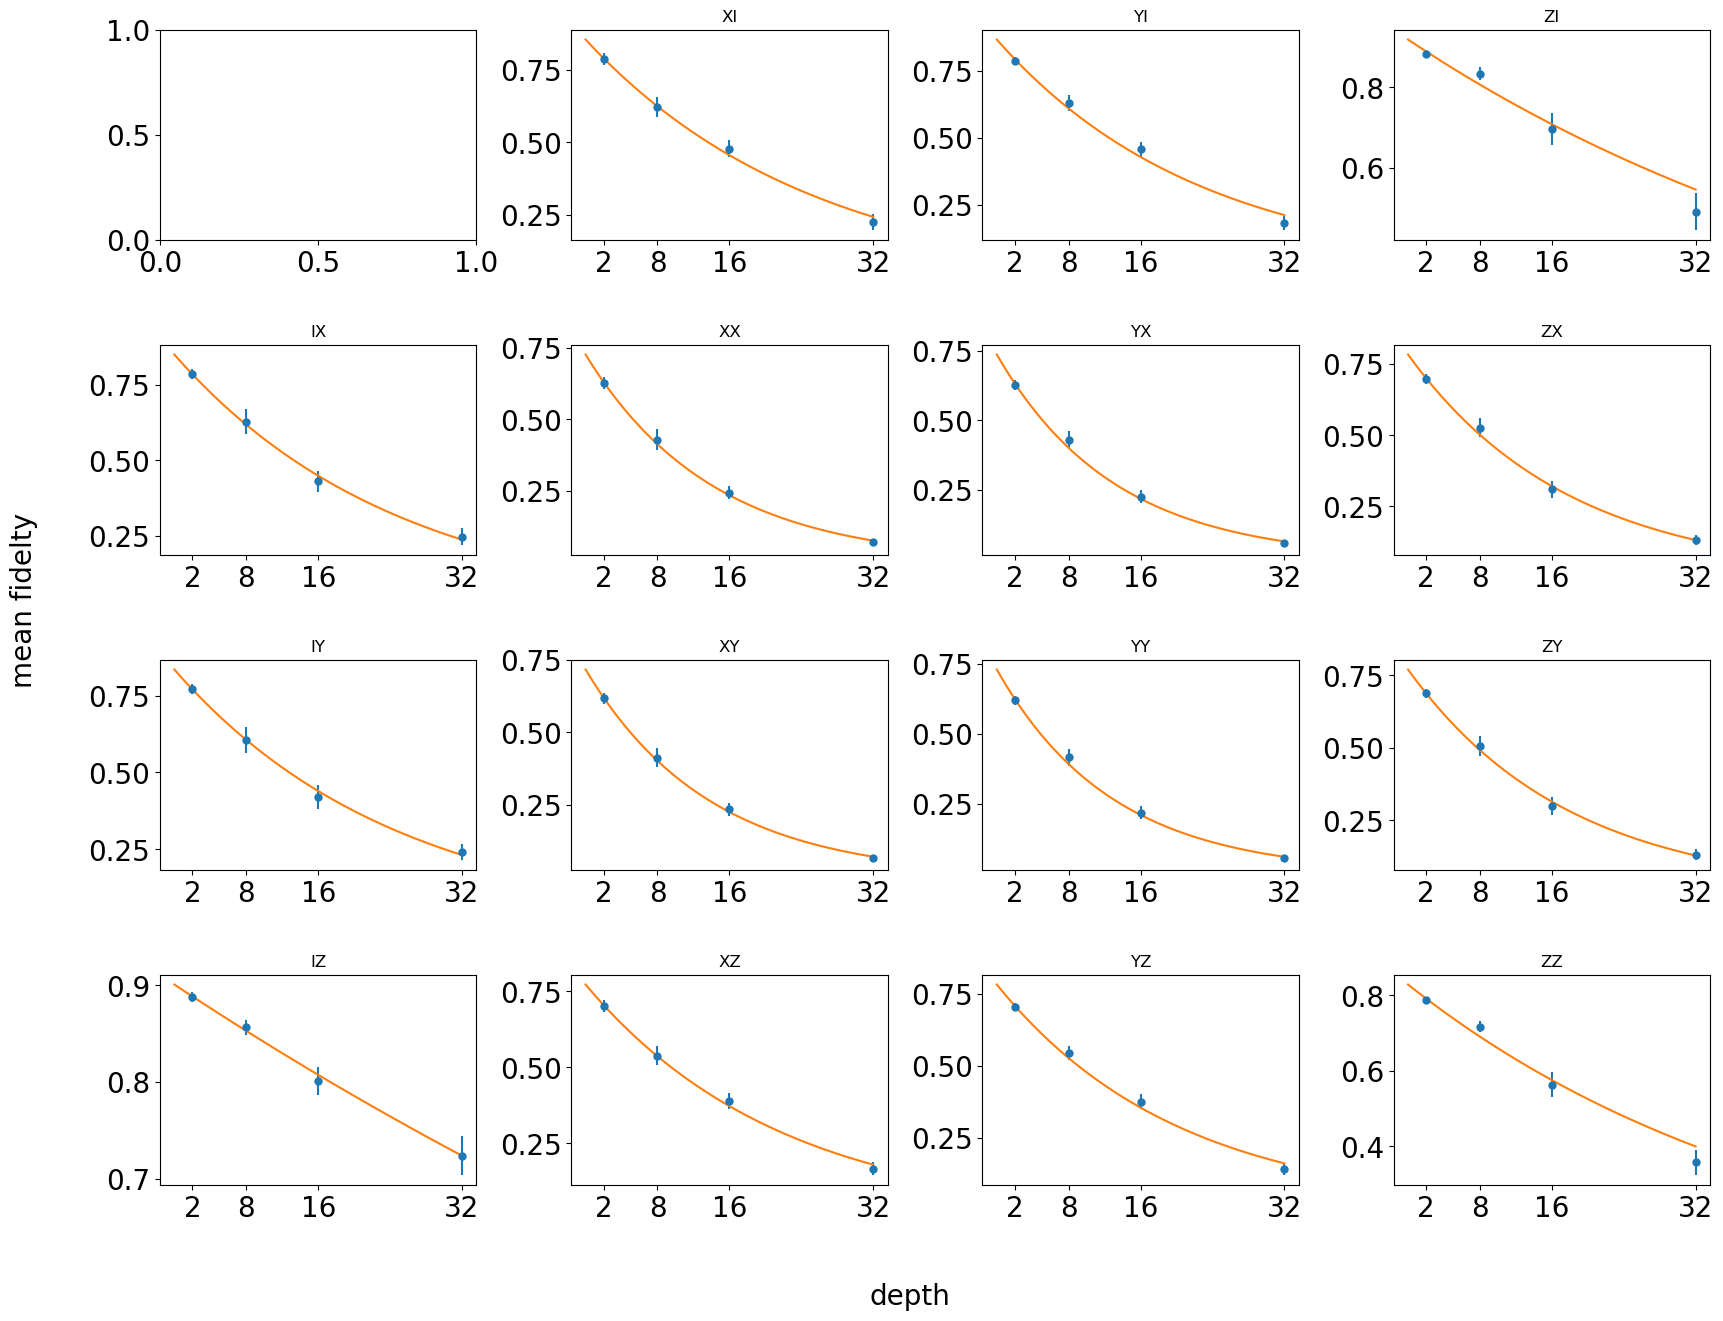

In [51]:
depth=[2,8,16,32]
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])

In [52]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9566833
XI 0.0050325
YI 0.0027402
ZI 0.014242
IX 0.0017628
XX 6.97e-05
YX -4.14e-05
ZX -5.87e-05
IY 0.0013258
XY 8.71e-05
YY -1.64e-05
ZY 0.0002819
IZ 0.0158465
XZ -2.34e-05
YZ 0.0001968
ZZ 0.0018714


In [54]:
np.save("II_fidelity_FTXX45_0919.npy",fidelity_list)

spam results